In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [129]:
train_data = pd.read_table('nounsDocument2.txt')

In [130]:
train_data[:5] # 상위 5개 출력

,구조
0,운영체제 서비스 운영체제 사용자 인터페이스 시스템 콜 시스템 콜 유형 시스템 프로그...
1,목표 운영체제 사용자 프로세스 다른 시스템 제공 서비스 설명 운영체제 구성 방법 대...
2,운영체제 서비스 운영체제 사용자 프로그램 프로그램 실행 환경 제공 사용자 프로그램 ...
3,운영체제 서비스 사용자 업무 수행 데 기능 제공 운영체제 서비스 사용자 인터페이스 ...
4,운영체제 서비스 사용자 업무 수행 데 기능 제공 운영체제 서비스 프로그램 실행 프로...


In [131]:
print(len(train_data)) # 리뷰 개수 출력

167


In [132]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

False


In [133]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [134]:
print(len(train_data)) # 리뷰 개수 출력

167


In [135]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['구조'] = train_data['구조'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

c:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [136]:
train_data[:5] # 상위 5개 출력

,구조
0,운영체제 서비스 운영체제 사용자 인터페이스 시스템 콜 시스템 콜 유형 시스템 프로그...
1,목표 운영체제 사용자 프로세스 다른 시스템 제공 서비스 설명 운영체제 구성 방법 대...
2,운영체제 서비스 운영체제 사용자 프로그램 프로그램 실행 환경 제공 사용자 프로그램 ...
3,운영체제 서비스 사용자 업무 수행 데 기능 제공 운영체제 서비스 사용자 인터페이스 ...
4,운영체제 서비스 사용자 업무 수행 데 기능 제공 운영체제 서비스 프로그램 실행 프로...


In [137]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

# 좀 시간 걸릴수 있음
tokenized_data = []
for sentence in train_data['구조']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

리뷰의 최대 길이 : 77
리뷰의 평균 길이 : 30.92814371257485


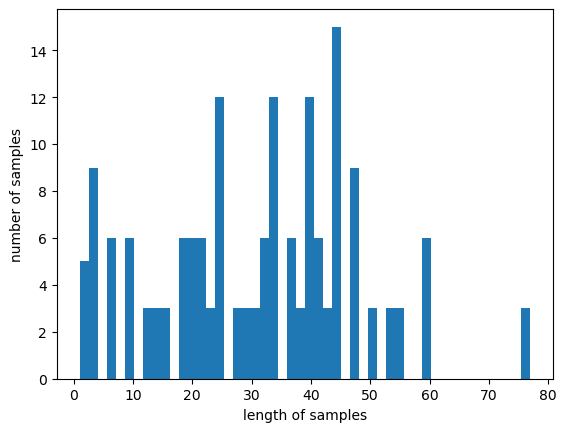

In [138]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [139]:
tokenized_data[:5] # 상위 5개 출력

[['운영체제',
  '서비스',
  '운영체제',
  '사용자',
  '인터페이스',
  '시스템',
  '콜',
  '시스템',
  '콜',
  '유형',
  '시스템',
  '프로그램',
  '운영체제',
  '설계',
  '및',
  '구현',
  '운영체제',
  '구조',
  '운영체제',
  '디버깅',
  '운영체제',
  '생',
  '시스템',
  '부팅'],
 ['목표',
  '운영체제',
  '사용자',
  '프로세스',
  '다른',
  '시스템',
  '제공',
  '서비스',
  '설명',
  '운영체제',
  '구성',
  '방법',
  '대해',
  '논의',
  '운영체제',
  '설치',
  '맞춤화',
  '과정',
  '부팅',
  '방법'],
 ['운영체제',
  '서비스',
  '운영체제',
  '사용자',
  '프로그램',
  '프로그램',
  '실행',
  '환경',
  '제공',
  '사용자',
  '프로그램',
  '실행',
  '시스템',
  '효율',
  '운용',
  '담당'],
 ['운영체제',
  '서비스',
  '사용자',
  '업무',
  '수행',
  '데',
  '기능',
  '제공',
  '운영체제',
  '서비스',
  '사용자',
  '인터페이스',
  '명령어',
  '라인',
  '인터페이스',
  '문자열',
  '명령',
  '입력',
  '배치',
  '인터페이스',
  '명령어',
  '명령어',
  '집합',
  '파일',
  '제공'],
 ['운영체제',
  '서비스',
  '사용자',
  '업무',
  '수행',
  '데',
  '기능',
  '제공',
  '운영체제',
  '서비스',
  '프로그램',
  '실행',
  '프로그램',
  '메모리',
  '적재',
  '실행',
  '실행',
  '종료',
  '정상',
  '비정상',
  '입출력',
  '연산',
  '프로그램',
  '실행',
  '요구',
  '파일',
  '입출력',
  '장치',
  '등',
  '

In [140]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [141]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(234, 100)

In [142]:
type(model.wv.vectors)

numpy.ndarray

In [143]:
# '한경수'과 유사한 단어들 뽑아보기
print(model.wv.most_similar("운영체제"))

[('시스템', 0.9985708594322205), ('사용자', 0.9979743957519531), ('프로세스', 0.997952938079834), ('메모리', 0.9979057312011719), ('커널', 0.9978761076927185), ('프로그램', 0.9977774024009705), ('사용', 0.9977016448974609), ('실행', 0.9976210594177246), ('제공', 0.9974662065505981), ('장치', 0.9974145889282227)]


In [144]:
# '히어로'과 유사한 단어들 뽑아보기
print(model.wv.most_similar("사용자"))

[('시스템', 0.9984065890312195), ('메모리', 0.9981628656387329), ('사용', 0.9980994462966919), ('커널', 0.9980294704437256), ('운영체제', 0.9979745149612427), ('실행', 0.9977537989616394), ('파일', 0.9977397322654724), ('프로그램', 0.9976139664649963), ('제공', 0.9975297451019287), ('다른', 0.9974008202552795)]


In [145]:
from sklearn.cluster import KMeans
import numpy as np
# 랜덤하게 실행되는 부분들에 대해 다음에 실행해도 동일한 결과를 얻기 위해 설정
seed = 11
rng = np.random.default_rng(seed)

k = 5
kmeans = KMeans(n_clusters=k, random_state=seed) # k-평균++ 초기화 사용

In [146]:
y_pred = kmeans.fit_predict(model.wv.vectors) # 클러스터링 결과 각 샘플의 클러스터 레이블을 리턴 받으려면 fit_predict 사용
y_pred

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 4, 4,
       3, 3, 3, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 0,
       3, 3, 4, 4, 3, 4, 0, 3, 4, 4, 3, 4, 0, 4, 3, 4, 4, 4, 0, 4, 4, 4,
       0, 4, 0, 2, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0,
       4, 4, 0, 4, 4, 4, 4, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0, 3, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [147]:
kmeans.fit(model.wv.vectors) # 클러스터링을 수행하고 그 결과를 객체의 속성에 저장하는 것까지만 수행하려면 fit 사용

KMeans(n_clusters=5, random_state=11)

In [148]:
kmeans.labels_ # 클러스터링 수행 결과가 labels_ 속성에 저장됨

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 4, 4,
       3, 3, 3, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 0,
       3, 3, 4, 4, 3, 4, 0, 3, 4, 4, 3, 4, 0, 4, 3, 4, 4, 4, 0, 4, 4, 4,
       0, 4, 0, 2, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0,
       4, 4, 0, 4, 4, 4, 4, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0, 3, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [149]:
# 각 클러스터의 센트로이드(중심)
kmeans.cluster_centers_

array([[-2.74564698e-02,  3.09607983e-02,  1.96626652e-02,
         2.72293985e-02,  2.18956750e-02, -1.06902942e-01,
         3.55685949e-02,  1.17244087e-01, -6.43805042e-02,
        -5.86317219e-02, -4.97758016e-03, -6.28655031e-02,
        -8.38567689e-03,  3.07230875e-02,  6.00223802e-03,
        -2.03674994e-02,  9.99983214e-03, -7.14457780e-02,
        -1.72054116e-02, -1.42412841e-01, -4.50748578e-03,
         1.87992882e-02,  3.09197474e-02, -3.66909206e-02,
         4.92245564e-03,  2.06279494e-02, -3.75006385e-02,
        -1.79116260e-02, -5.41104227e-02,  2.71590073e-02,
         4.75415476e-02,  1.56933386e-02,  4.37177271e-02,
        -3.36113647e-02, -3.66248339e-02,  8.69725347e-02,
         1.17538227e-02, -4.49325405e-02, -3.22548002e-02,
        -1.00317940e-01,  7.50698731e-04, -7.98738226e-02,
        -2.93889958e-02,  8.34281929e-03,  5.95035553e-02,
        -1.25057455e-02, -2.90200450e-02, -1.40627623e-02,
         4.66223545e-02,  3.39661129e-02,  5.53941056e-0

In [150]:
# 이너셔(inertia): 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리
kmeans.inertia_

1.8197171688079834

In [152]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(model.wv.vectors)

DBSCAN(eps=0.05)

In [153]:
# 각 샘플의 레이블: 핵심 샘플들의 인덱스 또는 이상치 인덱스(-1)
dbscan.labels_[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [154]:
# 핵심 샘플들의 인덱스
dbscan.core_sample_indices_[:10]

array([], dtype=int64)

In [155]:
# 핵심 샘플들
dbscan.components_[:5]

array([], shape=(0, 100), dtype=float64)

In [156]:
print(len(dbscan.core_sample_indices_))
print(len(dbscan.components_))

0
0


In [158]:
# scikit-learn을 이용한 병합 클러스터링
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5, linkage="complete")
agg = agg.fit(model.wv.vectors)